<a href="https://colab.research.google.com/github/rithikgoli/data100-sp20-finalproj/blob/master/Basketball_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [52]:
official_bs = pd.read_csv('Basketball-BoxScores.csv')
player_bs = pd.read_csv('Basketball-PlayerBoxScore.csv')
standings = pd.read_csv('Standings.csv')
team_bs = pd.read_csv('Basketball-TeamBoxScores.csv')
colleges = pd.read_csv('college.csv')


In [53]:
official_bs.head(5)

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,...,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,...,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,...,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,...,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,46.1538,66.6667,19.1466,7.8704,5.6217,...,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,46.1538,66.6667,19.1466,7.8704,5.6217,...,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409


In [54]:
player_bs.head(5)

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamDayOff,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Trevor Ariza,Starter,25,SG,80,200,1985-06-30,9,4,0,3,2,0,8,3,0.3750,4,1,0.25,4,2,0.5000,2,1,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Emeka Okafor,Starter,25,C,82,255,1982-09-28,10,0,1,0,4,1,10,4,0.4000,10,4,0.40,0,0,0.0000,4,2,0.5,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Bradley Beal,Starter,22,SG,77,202,1993-06-28,8,3,2,1,0,1,8,2,0.2500,4,0,0.00,4,2,0.5000,2,2,1.0,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Trevor Booker,Starter,17,PF,79,240,1987-11-25,4,1,4,1,1,4,9,2,0.2222,8,2,0.25,1,0,0.0000,0,0,0.0,1,0,1,CLE,East,Central,Home,Win,0


In [55]:
standings.head(5)

,stDate,teamAbbr,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5
0,2012-10-30,ATL,3,3rd,0,0,-,-,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
1,2012-10-30,BKN,3,3rd,0,0,-,-,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
2,2012-10-30,BOS,14,14th,0,1,L1,loss,1,1.0,107,120,0,0,0,1,0,1,0,0,1,107.0,120.0,-13.0,0,0,0,0,0.0,0.0,-13.0,-13.0,0.072,0.1687,13.8334,68.1666,0.131,10.742,71.258
3,2012-10-30,CHA,3,3rd,0,0,-,-,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
4,2012-10-30,CHI,3,3rd,0,0,-,-,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000


In [56]:
team_bs.head(5)

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,...,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,...,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.000,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,...,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.250,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,18.4211,...,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,13.8889,86.1111,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,East,Southeast,Home,Win,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,12.8205,...,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,17.0732,82.9268,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,West,Southwest,Away,Win,240,0,99,22,12,9,5,25,85,40,0.4706,70,35,0.5000,15,5,0.3333,18,14,0.7778,9,31,40,25,23,26,25,0,0,0,0,46.5116,55.0000,0.5327,0.5000,22.5000,...,24,14,6,5,21,77,38,0.4935,64,35,0.5469,13,3,0.2308,31,12,0.3871,15,31,46,29,17,20,25,0,0,0,0,53.4884,63.1579,0.5020,0.5130,32.6087,67.3913,13.3792,6.5517,5.4598,7.8125,1.1818,70.375,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790


In [57]:
colleges.head(5)

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,NBA__3ptpct,NBA__3ptpg,NBA_efgpct,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,NBA_ft%,NBA_ft_per_g,NBA_fta_p_g,NBA_g_played,NBA_ppg,NCAA__3ptapg,NCAA__3ptpct,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,0.000,0.0,0.502,0.502,2.4,4.8,0.701,0.9,1.3,256,5.7,0.0,NaN,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,NaN,NaN,NaN,NaN,0.428,3.5,8.2,0.728,2.0,2.8,505,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,0.056,0.0,0.559,0.559,10.2,18.1,0.721,4.3,6.0,1560,24.6,NaN,NaN,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,2.3,0.354,0.8,0.472,0.442,6.0,13.6,0.905,1.8,2.0,586,14.6,7.2,0.372,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.3,0.237,0.1,0.422,0.417,3.1,7.3,0.703,1.6,2.2,236,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
pd.set_option('display.max_columns', 100)  #to see more columns instead of '...'

colleges[(colleges['college'] == 'University of California, Los Angeles')]

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,NBA__3ptpct,NBA__3ptpg,NBA_efgpct,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,NBA_ft%,NBA_ft_per_g,NBA_fta_p_g,NBA_g_played,NBA_ppg,NCAA__3ptapg,NCAA__3ptpct,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,0.056,0.0,0.559,0.559,10.2,18.1,0.721,4.3,6.0,1560,24.6,NaN,NaN,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
19,19,2015,2016,"July 8, 1994","University of California, Los Angeles",6-5,Jordan Adams,G,/players/a/adamsjo01.html,209.0,0.8,0.385,0.3,0.457,0.402,1.2,2.9,0.607,0.5,0.9,32,3.2,4.3,0.331,1.4,NaN,11.6,0.467,5.4,0.839,5.0,4.2,69.0,16.4
26,26,2008,2018,"October 15, 1985","University of California, Los Angeles",6-5,Arron Afflalo,G,/players/a/afflaar01.html,210.0,2.9,0.386,1.1,0.514,0.449,3.9,8.7,0.825,1.8,2.2,761,10.8,5.4,0.373,2.0,NaN,10.9,0.457,5.0,0.781,3.6,2.8,104.0,14.8
55,55,1970,1979,"September 26, 1947","University of California, Los Angeles",6-2,Lucius Allen,G,/players/a/allenlu01.html,175.0,NaN,NaN,NaN,NaN,0.463,5.5,11.9,0.760,2.3,3.1,702,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,1981,1981,"September 12, 1958","University of California, Los Angeles",6-9,Darrell Allums,F,/players/a/allumda01.html,220.0,0.0,0.000,0.0,0.343,0.343,1.0,3.0,0.591,0.6,1.0,22,2.7,NaN,NaN,NaN,NaN,2.7,0.488,1.3,0.688,1.6,1.1,92.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4367,1975,1986,"May 2, 1953","University of California, Los Angeles",6-6,Jamaal Wilkes,F-G,/players/w/wilkeja01.html,190.0,0.1,0.135,0.0,0.500,0.499,7.5,15.1,0.759,2.6,3.5,828,17.7,NaN,NaN,NaN,NaN,12.5,0.514,6.4,0.750,2.8,2.1,90.0,15.0
4368,4368,1981,1983,"April 1, 1958","University of California, Los Angeles",6-7,James Wilkes,F,/players/w/wilkeja02.html,195.0,0.0,0.000,0.0,0.463,0.463,2.0,4.2,0.723,0.9,1.2,114,4.8,NaN,NaN,NaN,NaN,5.0,0.497,2.5,0.681,1.9,1.3,110.0,6.3
4471,4471,1991,1996,"March 16, 1968","University of California, Los Angeles",6-7,Trevor Wilson,F,/players/w/wilsotr01.html,210.0,0.0,0.000,0.0,0.456,0.456,2.3,5.0,0.567,1.2,2.0,103,5.7,0.1,0.167,0.0,NaN,11.2,0.498,5.6,0.587,5.2,3.0,126.0,14.3
4519,4519,1987,1988,"March 26, 1962","University of California, Los Angeles",6-11,Brad Wright,F,/players/w/wrighbr01.html,225.0,0.1,0.000,0.0,0.412,0.412,1.3,3.2,0.429,0.8,1.8,16,3.4,NaN,NaN,NaN,NaN,4.0,0.524,2.1,0.617,2.3,1.4,99.0,5.6


In [59]:
team_bs

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,...,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,...,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.000,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,...,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.250,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,18.4211,...,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,13.8889,86.1111,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,East,Southeast,Home,Win,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,12.8205,...,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,17.0732,82.9268,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,West,Southwest,Away,Win,240,0,99,22,12,9,5,25,85,40,0.4706,70,35,0.5000,15,5,0.3333,18,14,0.7778,9,31,40,25,23,26,25,0,0,0,0,46.5116,55.0000,0.5327,0.5000,22.5000,...,24,14,6,5,21,77,38,0.4935,64,35,0.5469,13,3,0.2308,31,12,0.3871,15,31,46,29,17,20,25,0,0,0,0,53.4884,63.1579,0.5020,0.5130,32.6087,67.3913,13.3792,6.5517,5.4598,7.8125,1.1818,70.375,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,2018-04-11,10:30,Regular,Garretson,Ron,Mott,Rodney,Richardson,Derek,LAC,West,Pacific,Home,Loss,240,2,100,27,17,8,1,17,83,41,0.4940,65,35,0.5385,18,6,0.3333,28,12,0.4286,8,33,41,32,21,21,26,0,0,0,0,45.5556,65.8537,0.52

In [60]:
team_bs["teamRslt"]

0        Loss
1         Win
2        Loss
3         Win
4         Win
         ... 
14753    Loss
14754    Loss
14755     Win
14756    Loss
14757     Win
Name: teamRslt, Length: 14758, dtype: object

In [63]:
#trying to one-hot encode wins or loss -- I think there's a better way to do it with SKLearn

win_or_loss_team, uniques = pd.factorize(team_bs["teamRslt"])
win_or_loss_team
team_bs["Win_or_Lose"] = win_or_loss_team  #0 for loss, 1 for win
team_bs

#plt.scatter(team_bs["teamPTS"], team_bs["Win_or_Lose"])
#home vs away compared to wins/loss plot
sns.scatterplot(team_bs["teamLoc"], team_bs["Win_or_Lose"])

#sns.barplot()


team_bs["teamLoc"]
#Calculate percentage of wins
team_bs.groupby(['teamLoc']).sum()/(len(team_bs)/2)

,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,...,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,Win_or_Lose
teamLoc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Away,241.789402,1.810814,100.946741,21.782491,14.486245,7.736956,4.643448,20.461038,84.150562,37.761892,0.449768,60.099471,29.281339,0.489721,24.051091,8.480553,0.350009,22.340832,16.942675,0.759150,10.445724,32.144600,42.590324,25.172110,25.338664,24.908524,24.835615,0.580973,0.089985,0.015991,0.00393,49.33534,57.603031,0.538170,0.500329,23.801170,75.340116,13.349597,8.075437,4.863786,7.878606,1.204874,73.456312,60.770003,105.651166,108.467376,-2.81621,0.428539,16.636285,1.639291,...,14.245155,7.766228,5.082532,19.797534,84.050549,38.658897,0.461079,60.106383,30.000678,0.501771,23.944166,8.658219,0.359964,23.249627,17.663776,0.761066,10.641550,33.097845,43.739396,26.060171,26.012603,25.586258,25.225234,0.635859,0.094999,0.012061,0.00393,50.66466,59.386696,0.550861,0.512742,24.119683,75.880317,13.121416,8.108457,5.320363,8.600724,1.238569,79.047754,65.411442,108.467376,105.651166,2.81621,0.441417,17.399639,1.763169,58.777004,95.573705,94.87661,0.413606
Home,241.800515,2.068980,103.639924,22.994579,14.245155,7.766228,5.082532,19.797534,84.050549,38.658897,0.461079,60.106383,30.000678,0.501771,23.944166,8.658219,0.359964,23.249627,17.663776,0.761066,10.641550,33.097845,43.739396,26.060171,26.012603,25.586258,25.225234,0.635859,0.094999,0.012061,0.00393,50.66466,59.386696,0.550861,0.512742,24.659884,76.198830,13.121416,8.108457,5.320363,8.600724,1.238569,79.047754,65.411442,108.467376,105.651166,2.81621,0.441417,17.399639,1.763169,...,14.486245,7.736956,4.643448,20.461038,84.150562,37.761892,0.449768,60.099471,29.281339,0.489721,24.051091,8.480553,0.350009,22.340832,16.942675,0.759150,10.445724,32.144600,42.590324,25.172110,25.338664,24.908524,24.835615,0.580973,0.089985,0.015991,0.00393,49.33534,57.603031,0.538170,0.500329,24.314576,75.685424,13.349597,8.075437,4.863786,7.878606,1.204874,73.456312,60.770003,105.651166,108.467376,-2.81621,0.428539,16.636285,1.639291,57.306052,95.573705,94.87201,0.586394


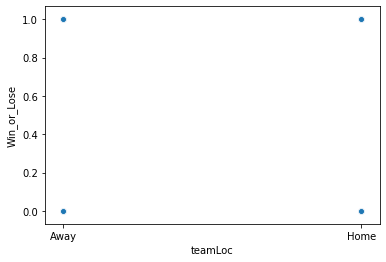

In [89]:
sns.scatterplot(team_bs["teamLoc"], team_bs["Win_or_Lose"])


(0, 35)

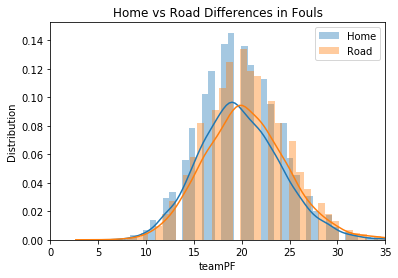

In [87]:
Home_teams = team_bs[team_bs["teamLoc"] == "Home"]
len(Home_teams)
Road_teams = team_bs[team_bs["teamLoc"] == "Away"]
len(Road_teams)

sns.distplot(Home_teams["teamPF"], label= "Home")
sns.distplot(Road_teams["teamPF"], label = "Road");
plt.legend(labels=['Home','Road'])
plt.title("Home vs Road Differences in Fouls");
plt.ylabel("Distribution")
plt.xlim(0, 35)

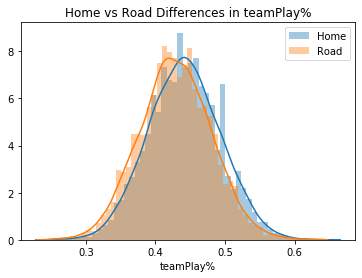

In [86]:
sns.distplot(Home_teams["teamPlay%"], label= "Home Play%")
sns.distplot(Road_teams["teamPlay%"], label = "Road Play%")
plt.legend(labels=['Home','Road'])
plt.title("Home vs Road Differences in teamPlay%");
#plt.xlim(0,13)

In [64]:
#one-hot-encoding home or away team, again I think there's a better way to do it with Scikit-Learn 
#see the end of this lecture: http://www.ds100.org/sp20/resources/assets/lectures/lec16/FeatureEngineering.html

home_or_away_team, unique_2 = pd.factorize(team_bs["teamLoc"])
home_or_away_team
team_bs["Home_or_Away"] = home_or_away_team  #0 for away, 1 for home    
team_bs

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,...,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,Win_or_Lose,Home_or_Away
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,...,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.000,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,0,0
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,...,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.250,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409,1,1
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,18.4211,...,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,13.8889,86.1111,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832,0,0
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,East,Southeast,Home,Win,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,12.8205,...,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,17.0732,82.9268,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832,1,1
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,West,Southwest,Away,Win,240,0,99,22,12,9,5,25,85,40,0.4706,70,35,0.5000,15,5,0.3333,18,14,0.7778,9,31,40,25,23,26,25,0,0,0,0,46.5116,55.0000,0.5327,0.5000,22.5000,...,6,5,21,77,38,0.4935,64,35,0.5469,13,3,0.2308,31,12,0.3871,15,31,46,29,17,20,25,0,0,0,0,53.4884,63.1579,0.5020,0.5130,32.6087,67.3913,13.3792,6.5517,5.4598,7.8125,1.1818,70.375,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,2018-04-11,10:30,Regular,Garretson,Ron,Mott,Rodney,Richardson,Derek,LAC,West,Pacific,Home,Loss,240,2,100,27,17,8,1,17,83,41,0.4940,65,35,0.5385,18,6,0.3333,28,12,0.4286,8,33,41,32,21,21,26,0,0,0,0,45.5556,65.8537,0.5

In [65]:
team_bs.corr()

,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,...,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,Win_or_Lose,Home_or_Away
teamMin,1.000000,0.008142,0.209832,0.077227,0.073290,0.047100,0.065630,0.167276,0.346898,0.180631,-0.045278,0.211761,0.139779,-0.041519,0.097686,0.055992,-0.017443,0.098586,0.091702,-0.006719,0.095869,0.186738,0.211520,-0.001238,-0.005959,-0.021486,-0.050505,0.845069,0.623228,0.372903,0.203724,4.034519e-04,-0.030922,-0.040062,-0.042721,0.008042,-0.007960,-0.028337,-0.022898,0.011281,0.004127,-0.034797,0.096748,-0.045071,-0.021844,-0.022719,0.000687,-0.030477,-0.042995,-0.017932,...,0.047623,0.065029,0.168404,0.347993,0.180325,-0.046441,0.212537,0.139497,-0.042653,0.097863,0.055962,-0.017907,0.097219,0.090671,-0.006151,0.095920,0.185878,0.210840,-0.001587,-0.007008,-0.021890,-0.050425,0.845353,0.622958,0.372950,0.203510,-4.034519e-04,-0.031489,-0.041260,-0.043813,0.008179,-0.008179,-0.029161,-0.022357,0.010691,0.003416,-0.036353,0.095709,-0.045324,-0.022719,-0.021844,-0.000687,-0.031237,-0.043615,-0.017311,-0.010313,0.452920,-0.062060,0.000267,0.000729
teamDayOff,0.008142,1.000000,0.015109,0.047589,0.019844,0.033297,0.025721,-0.017020,0.005633,0.027352,0.025281,0.031041,0.043685,0.018978,-0.031706,-0.023527,-0.002635,0.010583,-0.001056,-0.024963,0.016928,0.025267,0.030985,0.024727,0.011426,0.007129,-0.015667,0.012138,0.000498,-0.003806,-0.004454,2.419231e-02,0.041761,0.008827,0.012909,0.021626,-0.007518,0.015442,0.031204,0.023064,0.017758,0.010379,0.040392,0.039241,0.006508,-0.040923,0.037216,0.024850,0.041089,0.010290,...,0.030332,-0.014427,0.003001,0.015537,-0.016089,-0.029714,0.034720,0.002968,-0.035473,-0.026062,-0.026901,-0.011179,-0.008002,-0.011238,-0.005819,0.019102,-0.015901,-0.001709,-0.015725,-0.005625,-0.024989,-0.015711,0.012065,0.001426,-0.003806,-0.004454,-2.419231e-02,-0.004073,-0.037453,-0.034868,0.023069,-0.023069,0.019795,0.027370,-0.016849,-0.023243,-0.036219,-0.030618,-0.031974,-0.040923,0.006508,-0.037216,-0.031613,-0.020556,-0.026218,0.008426,0.018085,0.015396,0.031070,0.120548
teamPTS,0.209832,0.015109,1.000000,0.571203,-0.119063,0.118369,0.059997,0.147249,0.297007,0.836192,0.696185,-0.001949,0.455721,0.564660,0.304665,0.531177,0.459209,0.271490,0.321298,0.168790,-0.023908,0.157877,0.116073,0.515193,0.514100,0.515630,0.464654,0.208557,0.149313,0.078878,0.053695,2.590676e-01,0.107873,0.777091,0.739262,0.095237,0.054896,-0.214217,0.044304,0.003758,0.059823,0.746598,0.858100,0.830919,0.859223,0.146177,0.559478,0.750587,0.460723,0.390231,...,-0.072145,-0.154351,0.212361,0.300590,0.272977,0.080615,0.078682,0.149632,0.101561,0.211061,0.172180,0.030608,0.192955,0.198342,0.034914,0.009867,-0.304557,-0.245589,0.153381,0.168683,0.138318,0.217171,0.186067,0.140198,0.075434,0.053294,-2.590676e-01,-0.059644,0.127126,0.103564,0.126894,-0.126894,-0.074875,-0.153478,-0.210108,-0.167466,0.145428,0.035750,0.003475,0.146177,0.859223,-0.559478,0.086093,-0.006835,0.041141,-0.072318,0.473033,0.409933,0.453941,0.110177
teamAST,0.077227,0.047589,0.571203,1.000000,-0.047159,0.096829,0.091384,-0.013591,0.205233,0.639481,0.547056,-0.009169,0.347140,0.438909,0.219959,0.408173,0.365189,-0.159933,-0.149939,0.002772,-0.118531,0.121031,0.029072,0.339930,0.308626,0.314021,0.211674,0

In [66]:
team_bs["teamLoc"].value_counts()

Away    7379
Home    7379
Name: teamLoc, dtype: int64

In [88]:
team_bs.corr()["Win_or_Lose"].sort_values(ascending=True).to_frame().head(50)

,Win_or_Lose
opptEDiff,-0.809779
opptFIC40,-0.609835
opptFIC,-0.607013
opptOrtg,-0.516026
teamDrtg,-0.516026
opptPlay%,-0.484833
opptTS%,-0.483781
opptPPS,-0.469073
opptEFG%,-0.460937
opptFG%,-0.454300


In [68]:
team_bs.corr()["Home_or_Away"].sort_values(ascending=False).to_frame().head(50)

,Home_or_Away
Home_or_Away,1.000000
teamEDiff,0.195442
Win_or_Lose,0.172788
teamFIC40,0.172759
teamFIC,0.172147
teamTREB%,0.126509
opptDrtg,0.124544
teamOrtg,0.124544
teamPlay%,0.124060
teamDayOff,0.120548
